In [39]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Linear Regression

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# generate the dataset
# shape is 100 x 1
x = 2 * np.random.rand(100, 1) # Gaussion Districution 
y = 2 * x + 3 + np.random.rand(100, 1) # add some noise
y

array([[6.43996814],
       [4.79398324],
       [7.32467275],
       [6.62170861],
       [5.49253245],
       [6.75484795],
       [4.57174499],
       [6.55759244],
       [5.73558528],
       [6.00653763],
       [6.31678503],
       [3.97977513],
       [4.26104984],
       [7.01424857],
       [7.66489954],
       [6.93981818],
       [4.38467141],
       [7.22349856],
       [5.93143396],
       [6.90135741],
       [4.35786709],
       [6.14806222],
       [5.83693222],
       [5.67413655],
       [7.30824632],
       [3.97981619],
       [7.27272624],
       [4.52857112],
       [6.40694648],
       [5.81786748],
       [7.16617718],
       [6.31794108],
       [4.65855275],
       [5.26873716],
       [4.37216452],
       [3.8495109 ],
       [7.01726317],
       [6.5202155 ],
       [7.22022615],
       [5.68335091],
       [6.03962467],
       [4.05494111],
       [5.84540203],
       [5.23052245],
       [7.3847579 ],
       [3.77446132],
       [4.90592308],
       [6.300

<Figure size 640x480 with 0 Axes>

(0.0, 2.0)

(2.0, 8.0)

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

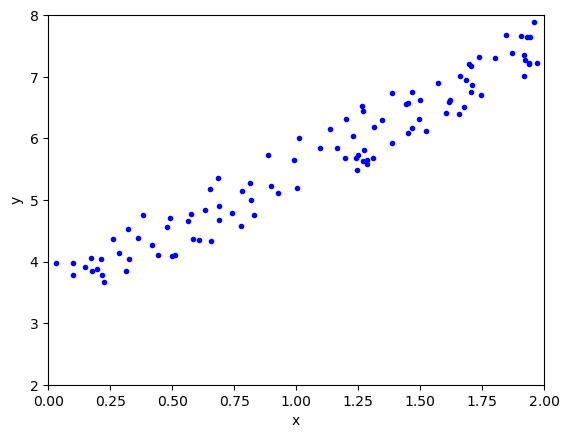

In [41]:
plt.figure()
plt.plot(x, y, 'b.')
plt.xlim([0, 2])
plt.ylim([2, 8])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Normal Equation
$$\boldsymbol{\theta} = (X^T X)^{-1} X^T y$$

In [42]:
# Accordding to Normal Equation
# Add bias
x_bias = np.concatenate([np.ones_like(x), x], axis=1)
theta = np.linalg.inv(x_bias.T @ x_bias) @ x_bias.T @ y
theta

array([[3.50879155],
       [1.98842974]])

shape of theta
$$\begin{bmatrix}
\text{bias} \\
\text{weight}
\end{bmatrix}

In [43]:
# validation theta
# give 2 points, and predict their results
test_x = np.array([[0], [2]])
pred_y = np.concatenate([np.ones_like(test_x), test_x], axis=1) @ theta
pred_y

array([[3.50879155],
       [7.48565103]])

<Figure size 640x480 with 0 Axes>

(-0.5, 2.0, 3.0, 8.0)

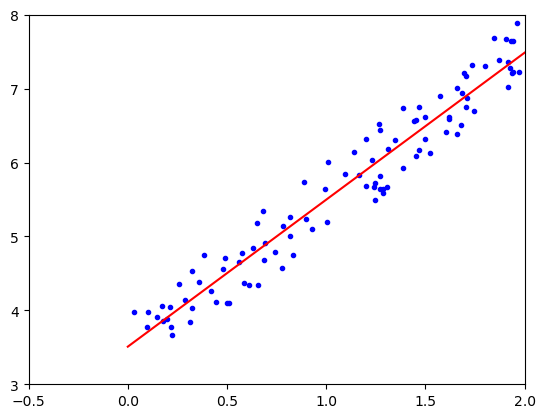

In [44]:
# plot thr graph
plt.figure()
plt.plot(x, y, 'b.')
plt.plot(test_x, pred_y, 'r-')
plt.axis([-0.5, 2, 3, 8])
plt.show()

use scikit-learn

In [45]:
from sklearn.linear_model import LinearRegression
# use normal equation to solve the problem
linear_reg = LinearRegression()
linear_reg.fit(x, y)
# weight
weight = linear_reg.coef_
weight
# bias
bias = linear_reg.intercept_
bias

LinearRegression()

array([[1.98842974]])

array([3.50879155])

In [46]:
parameters = np.concatenate([bias.reshape(1, 1), weight], axis=0)
parameters - theta

array([[-2.66453526e-15],
       [ 2.88657986e-15]])

Gradient Descent
$$\nabla J(\boldsymbol{\theta}) = \frac{2}{m} X^T (X \boldsymbol{\theta} - y)$$
$$\boldsymbol{\theta} := \boldsymbol{\theta} - eta * \nabla J(\boldsymbol{\theta})$$

In [47]:
# Normal equation gradient descent
eta = 0.01
n_iterations = 1000000
m = 100
# choose 'theta' randomly
theta = np.random.rand(2, 1)
for _ in range(n_iterations):
    grandient = 2/m * x_bias.T @ (x_bias @ theta - y)
    theta -= eta * grandient
theta

array([[3.50879155],
       [1.98842974]])

BGD: Batch Gradient Descent

In [48]:
# compare eta(learning rate) influence
bgd_theta_path = []
def plot_eta_influence(theta, eta):
    n_iterations = 1000
    size = len(x_bias)
    plt.plot(x, y, 'b.')
    for _ in range(n_iterations):
        pred_y = x_bias @ theta
        plt.plot(x, pred_y, 'b-')
        gradient = 2/size * x_bias.T @ (pred_y - y)
        theta -= eta * gradient
        if eta == 0.05:
            bgd_theta_path.append(theta.copy())
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([0, 2, 2, 8])
    plt.title(f"{eta}")

<Figure size 1200x800 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

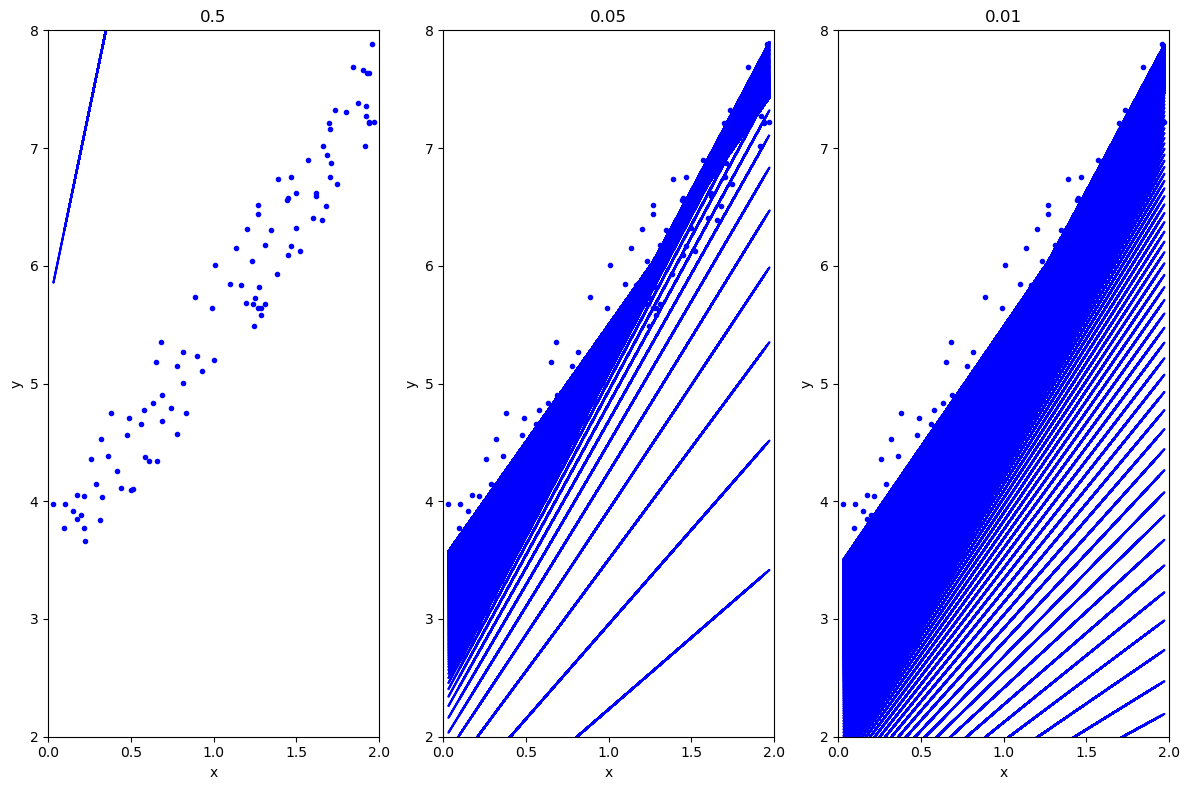

In [49]:
theta = np.random.rand(2, 1) * 0.1
plt.figure(figsize=(12,8))
plt.subplot(131)
plot_eta_influence(theta, 0.5)
plt.subplot(132)
theta = np.random.rand(2, 1) * 0.1
plot_eta_influence(theta, 0.05)
plt.subplot(133)
theta = np.random.rand(2, 1) * 0.1
plot_eta_influence(theta, 0.01)
plt.tight_layout()
plt.show()

SGD
-> use every single sample to train
$$ \boldsymbol{\theta} := \boldsymbol{\theta} - \text{eta} \cdot x_i^{T}(x_i \cdot \boldsymbol{\theta} - y_i) $$

In [50]:
# SGD: Stochastic Gradient Descent
sgd_theta_path = []
def learning_rate(m):
    t0, t1 = 5, 50
    return t0 / (t1+m)
# in the last period, the 'step' is becoming smaller and smaller
n_epochs = 50
np.random.seed(37)
m = len(x)
def sgd(theta):
    for epoch in range(n_epochs):
        for i in range(m):
            # choose one random sample
            # some visualization
            if epoch < 10 and i < 10:
                pred_y = x_bias @ theta
                plt.plot(x, pred_y, 'r-')
            idx = np.random.randint(m)
            cur_x = x_bias[idx:idx+1]
            cur_y = y[idx:idx+1]
            # use cur_x and cur_y to calculate gradient
            gradient = cur_x.T @ (cur_x @ theta - cur_y)
            theta -= learning_rate(epoch*m+i) * gradient
            sgd_theta_path.append(theta.copy())


array([[-0.05446361],
       [ 0.67430807]])

(0.0, 2.0, 0.0, 8.0)

Text(0.5, 1.0, 'SGD')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

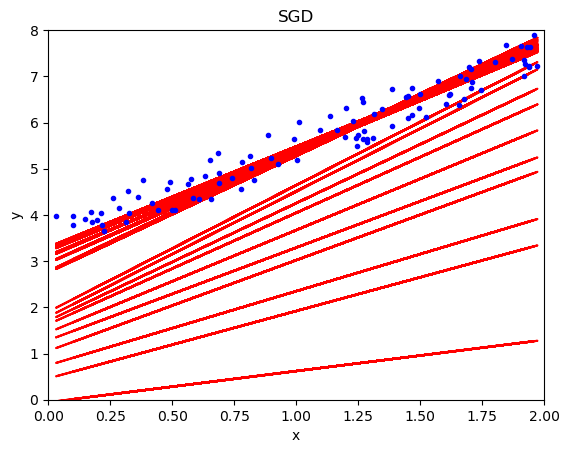

[array([[0.46057577],
        [1.4594579 ]]),
 array([[0.74495168],
        [1.60452254]]),
 array([[1.05480008],
        [1.96555162]]),
 array([[1.28569263],
        [2.00634291]]),
 array([[1.45251089],
        [2.21840024]]),
 array([[1.63072521],
        [2.41381688]]),
 array([[1.70694874],
        [2.5468817 ]]),
 array([[1.79370599],
        [2.71533946]]),
 array([[1.90243565],
        [2.73966724]]),
 array([[1.95371778],
        [2.81657916]]),
 array([[1.99854528],
        [2.84601106]]),
 array([[1.99743679],
        [2.84421765]]),
 array([[2.0954073 ],
        [2.93113448]]),
 array([[2.07790573],
        [2.9027916 ]]),
 array([[2.07491915],
        [2.89702896]]),
 array([[2.12841111],
        [2.95010126]]),
 array([[2.19462565],
        [2.96491647]]),
 array([[2.24449518],
        [2.99928025]]),
 array([[2.30083541],
        [3.02276713]]),
 array([[2.26101442],
        [2.97151115]]),
 array([[2.20371765],
        [2.86035721]]),
 array([[2.26137999],
        [2.8

In [51]:
v = np.random.randn(2, 1)
v
sgd(v)
plt.plot(x, y, 'b.')
plt.axis([0, 2, 0, 8])
plt.title('SGD')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
sgd_theta_path

mini_batch  \
MSE:
$$ L(\boldsymbol{\theta}) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y_i})^2 $$
$$ \boldsymbol{\theta} := \boldsymbol{\theta} - \text{eta} \cdot X^T \cdot (X \cdot \boldsymbol{\theta} - \hat{y}) $$
$$ \nabla J(\boldsymbol{\theta}) $$
eta -> learning rate

Attention: x_bias x theta

In [52]:
m = len(x)
mgd_theta_path = []
n_epochs = 50

def mini_batch(batch_size, theta):
    for epoch in range(n_epochs):
        shuffle_indices = np.random.permutation(m)
        x_bias_shuffled = x_bias[shuffle_indices]
        y_shuflled = y[shuffle_indices]
        t = 0
        for i in range(0, m, batch_size):
            t += 1
            if epoch < 10 and i < 10:
                pred_y = x_bias @ theta
                plt.plot(x, pred_y, 'r-')
            cur_x = x_bias_shuffled[i:i+batch_size]
            cur_y = y_shuflled[i:i+batch_size]
            gradient = cur_x.T @ (cur_x @ theta - cur_y)
            theta -= 1/batch_size * learning_rate(t) * gradient
            mgd_theta_path.append(theta.copy())

(0.0, 2.0, 0.0, 8.0)

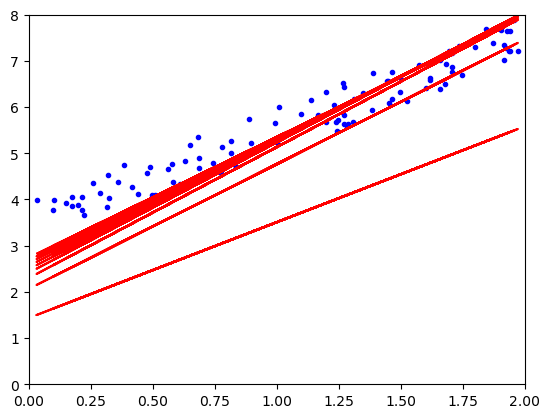

In [53]:
v = np.random.randn(2, 1)
plt.plot(x, y, 'b.')
mini_batch(20, v)
plt.axis([0, 2, 0, 8])
plt.show()


In [54]:
theta_bgd = np.array(bgd_theta_path)
theta_sgd = np.array(sgd_theta_path)
theta_mgd = np.array(mgd_theta_path)
theta_mgd.shape


(250, 2, 1)

(2.8, 3.54, 1.86, 2.6)

Text(0.5, 0, 'bias')

Text(0, 0.5, 'weight')

Text(0.5, 1.0, 'different ways')

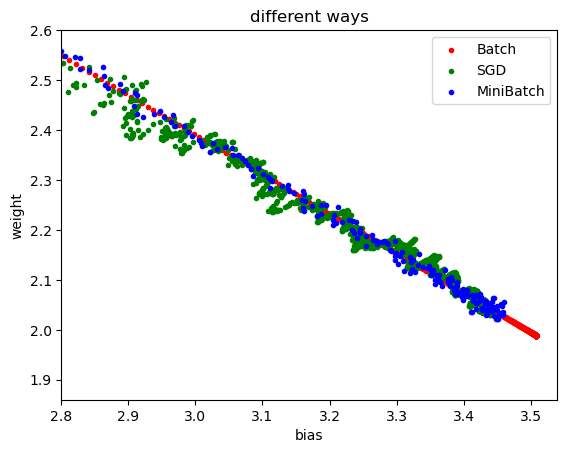

In [55]:

plt.scatter(theta_bgd[:, 0, :], theta_bgd[:, 1, :], c='red', marker='.', label='Batch')
plt.scatter(theta_sgd[:, 0], theta_sgd[:, 1], c='green', marker='.', label='SGD')
plt.scatter(theta_mgd[:, 0], theta_mgd[:, 1], c='blue', marker='.', label='MiniBatch')
plt.axis([2.8,3.54,1.86,2.6])
plt.legend()
plt.xlabel('bias')
plt.ylabel('weight')
plt.title('different ways')
plt.show()

Polynomial -> Linear Regression

$$ y = 3 \cdot x^2 + 2 $$ 

(-3.0, 3.0, 0.0, 8.0)

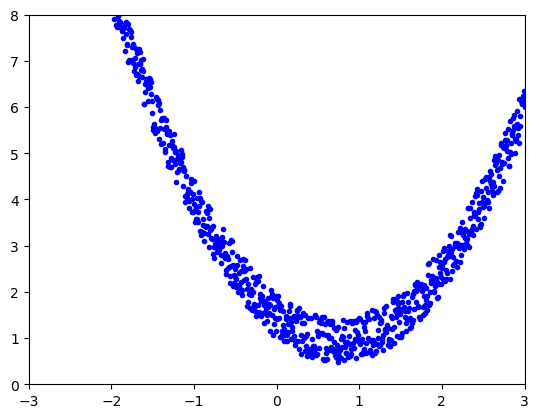

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# Create an array of 100 evenly spaced values between start and end
x = np.linspace(-3, 3, 1000).reshape(-1, 1)
y = x**2 - 3/2*x + 1 + np.random.rand(1000, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=37)
plt.axis([-3, 3, 0, 8])
plt.plot(x, y, 'b.')

In [57]:
poly_model = PolynomialFeatures(degree=2, include_bias=True)
poly_data = poly_model.fit_transform(x_train, y_train)
poly_data.shape
# a kind of preprocessing

(900, 3)

In [58]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(poly_data, y_train)
linear_reg.coef_
linear_reg.intercept_

LinearRegression()

array([[ 0.        , -1.5005064 ,  1.00194343]])

array([1.47658586])

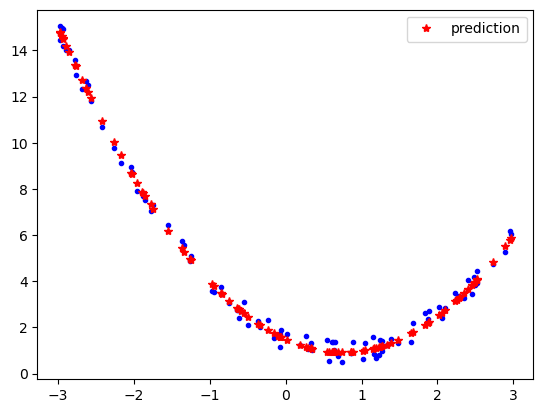

In [59]:
# test
x_test_poly = poly_model.transform(x_test)
pred_y = linear_reg.predict(x_test_poly)
plt.plot(x_test, y_test, 'b.')
plt.plot(x_test, pred_y, 'r*', label='prediction')
plt.legend()
plt.show()

Different Drgrees Influence

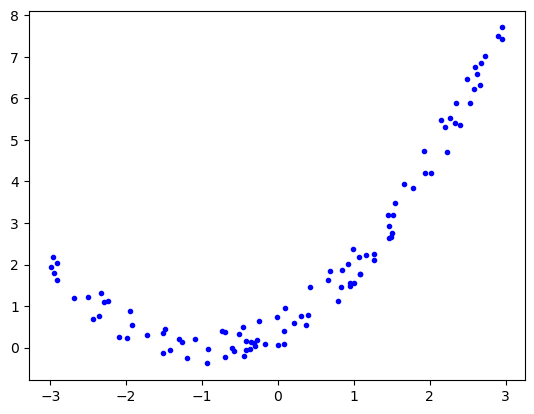

In [60]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5*x**2 + x + np.random.rand(100, 1)
plt.plot(x, y, 'b.')
plt.show()
x_new = np.linspace(-3, 3, 100).reshape(-1, 1)
# y = x**2
# plt.plot(x, y, 'b.')

<Figure size 640x480 with 0 Axes>

Pipeline(steps=[('poly_f', PolynomialFeatures(include_bias=False)),
                ('std', StandardScaler()), ('lin_reg', LinearRegression())])

Pipeline(steps=[('poly_f', PolynomialFeatures(degree=10, include_bias=False)),
                ('std', StandardScaler()), ('lin_reg', LinearRegression())])

Pipeline(steps=[('poly_f', PolynomialFeatures(degree=99, include_bias=False)),
                ('std', StandardScaler()), ('lin_reg', LinearRegression())])

(-3.0, 3.0, -5.0, 10.0)

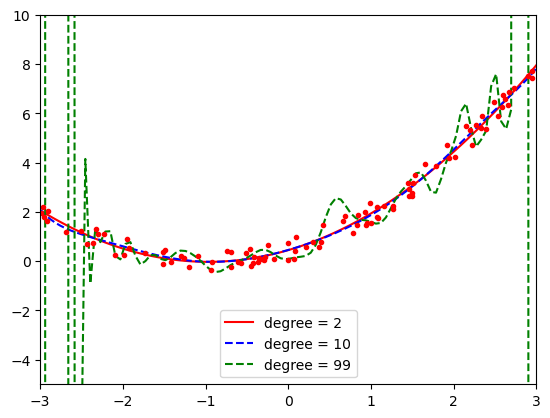

In [61]:
# Overfitting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

degrees = [2, 10, 99]
styles = ['r-', 'b--', 'g--']
plt.figure()

for degree, style in zip(degrees, styles):
    poly_f = PolynomialFeatures(degree=degree, include_bias=False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    pipe_line = Pipeline([('poly_f', poly_f),
                          ('std', std),
                          ('lin_reg', lin_reg)])
    pipe_line.fit(x, y)
    pred_y = pipe_line.predict(x_new)
    plt.plot(x_new, pred_y, style, label=f'degree = {degree}')
plt.plot(x,y,'r.')
# plot the points in the last
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()


Test data set influence

(0.0, 80.0, 0.0, 8.0)

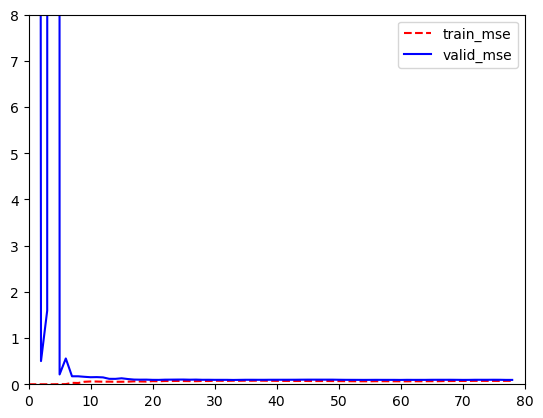

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# create a PipeLine
poly_features = PolynomialFeatures(degree=4, include_bias=True)
standard_scalar = StandardScaler()
linear_reg = LinearRegression()

model = Pipeline([('poly_features', poly_features),
                      ('standard_scalar', standard_scalar),
                      ('linear_reg', linear_reg)])

x_train, x_valid, y_train, y_valid = train_test_split(x, y, \
                            test_size=0.2, random_state=37)


# model = lin_reg
train_mse, valid_mse = [], []

for n in range(1, len(x_train)):
    cur_x = x_train[0:n, :]
    cur_y = y_train[0:n, :]
    _ = model.fit(cur_x, cur_y)
    y_on_train = model.predict(cur_x)
    y_on_valid = model.predict(x_valid)
    train_mse.append(mean_squared_error(cur_y, y_on_train))
    valid_mse.append(mean_squared_error(y_valid, y_on_valid))

plt.plot(train_mse, 'r--', label='train_mse')
plt.plot(valid_mse, 'b-', label='valid_mse')
plt.axis([0,80,0,8])
plt.legend()
plt.show()


Ridge Regression and Lasso Regression


$$
\begin{align}
\text{Ridge Regression(L2 regularization)} &= \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \alpha \sum_{i=1}^{p} \beta_i^2 \\
\text{Lasso Regression(L1 regularization)} &= \frac{1}{n} \sum_{i=1}^{n}
(y_i - \hat{y_i})^2 + \alpha \sum_{i=1}^{p}|\beta_i|
\end{align}
$$




(0.0, 4.0, -1.0, 4.0)

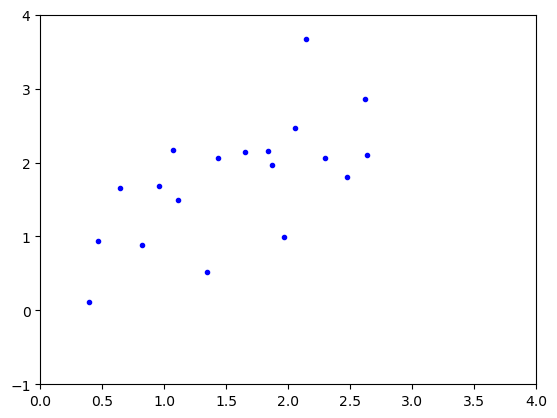

In [79]:
model_class = {'Ridge', 'Lasso'}
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


m = 20
x = 3*np.random.rand(m,1)
y = 0.5 * x + np.random.randn(m,1)/1.5 +1
plt.plot(x, y, 'b.')
plt.axis([0, 4, -1, 4])
plt.show()


In [115]:
# Ridge Regression(degree = 3)
def plot_regularization(model, name, style):
    poly = PolynomialFeatures(degree=10, include_bias=False)
    std = StandardScaler()
    pipe_line = Pipeline([('poly', poly),
                          ('std', std),
                          ('linear', model)])
    pipe_line.fit(x, y)
    x_test = np.linspace(0,3,74).reshape(74,1)
    # y_test = 0.5*x_test**2 + x_test
    pred_y = pipe_line.predict(x_test)
    # mse = mean_squared_error(y_test, pred_y)
    plt.plot(x_test, pred_y, style, label=name)
    plt.plot(x, y, 'r.')
    plt.axis([0, 3.1, -0.5, 4])
    plt.legend()


<Figure size 640x480 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

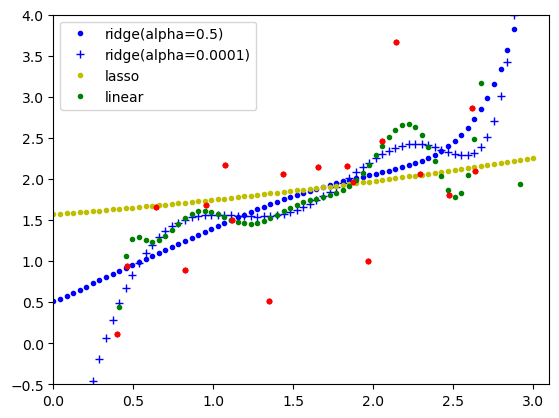

In [117]:
ridge1 = Ridge(alpha=0.5)
ridge2 = Ridge(alpha=0.0001)
lasso = Lasso(alpha=0.5)
line = LinearRegression()
plt.figure()
plot_regularization(ridge1, 'ridge(alpha=0.5)', 'b.')
plot_regularization(ridge2, 'ridge(alpha=0.0001)', 'b+')
plot_regularization(lasso, 'lasso', 'y.')
plot_regularization(line, 'linear', 'g.')
plt.show